## [Optimiza tu cartera de inversión con Python (Linkedin)](https://www.linkedin.com/pulse/optimiza-tu-cartera-de-inversión-con-python-rodrigo-garcía-ruiz/)

[Rodrigo García Ruiz](https://www.linkedin.com/in/rogarui/?lipi=urn%3Ali%3Apage%3Ad_flagship3_pulse_read%3B8XUrmKCpRo6DP1WDhwK8kA%3D%3D)

Energy and Risk Management Analysis Manager | Quant AI Developer | OMIE-Tracker | Technology, Investment and Energy enthusiast

1 de octubre de 2020

A principios de año (2020) decidí empezar* mi propia cartera de ETF's, con un simple propósito; "dejar de trabajar cuanto antes".

¡Vaya año para comenzar a invertir Rodrigo! Pues si... pero sinceramente, creo que hasta me ha venido bien para realmente comprobar si iba mantenerme firme al plan establecido o si por lo contrario, al primer contratiempo que me encontrara, iba a coger el dinero y salir corriendo.

Veamos la evolución de la cartera durante estos 9 meses de 2020:
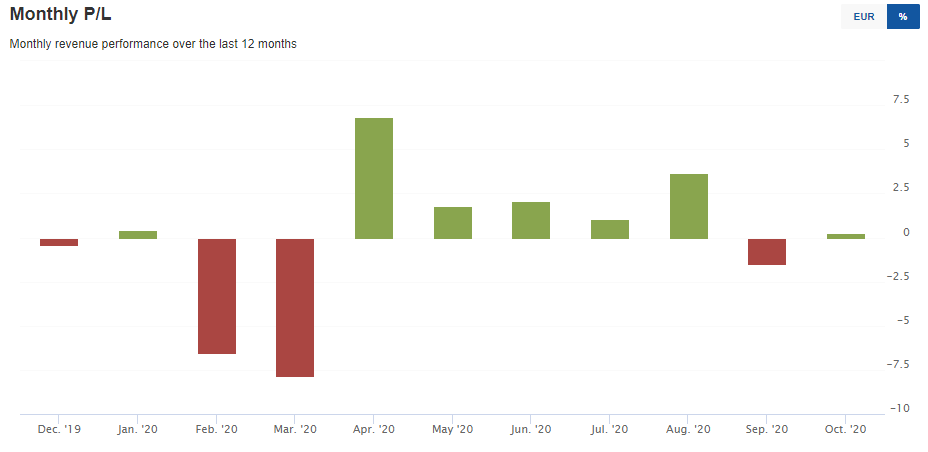
Fuente: Investing.com

Fuertes caídas en Febrero y Marzo del 6.54% y 7.85%. Posteriormente 5 meses con balance positivo y un mes de Septiembre que vuelve a la senda bajista (cartera actualmente en positivo).

¿Qué me han enseñado estos meses duros con la pandemia de por medio y los mercados medio locos?

Mantente firme al plan de inversión, pase lo que pase en el mercado. "Stay the course"
Evita "informarte" en exceso, el ruido de mercado te puede jugar malas pasadas. No hagas caso a esos grupos de telegram/whatsapp con caza-chicharros.
En un plan como este, a 20 años (si es menos, bienvenido sea), ¡hay que alegrarse de comprar barato! Solemos tener ese sesgo mental; no me importa comprar una acción/fondo/etf en máximos históricos, pero nos da reparo cuando baja un 10/20%. Siempre y cuando sigas tu plan, que no te entre miedo en esos momentos bajistas.
Uniendo todos estos temas de finanzas personales con Python, me propuse investigar sobre si el "Asset Allocation" que había elegido para invertir era el correcto o había una forma de mejorarlo (que no lo iba a hacer, no olvidemos el stay the course) y mas importante aún, hacerlo todo con Python.

A continuación os muestro el desempeño por activo de mi cartera desde el inicio:
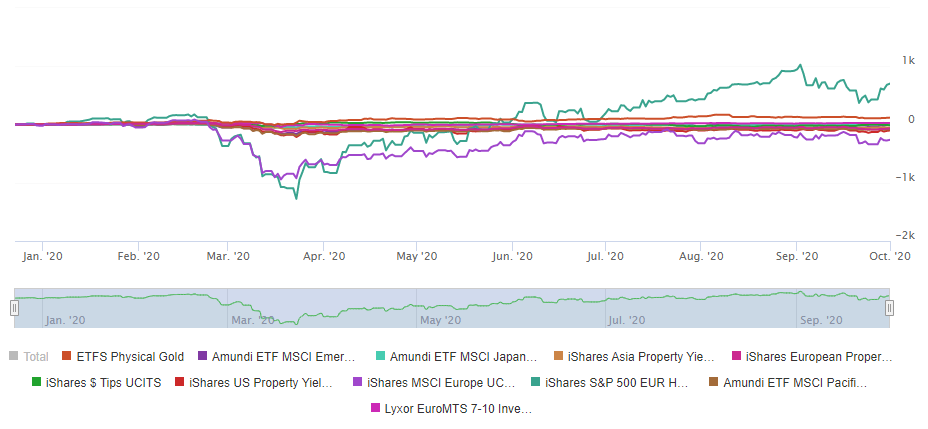
Fuente: Investing.com

Como podemos ver, fueron 11 los activos elegidos para la elaboración de la cartera (Si! quizá me complique demasiado la vida...) y lo que vamos a tratar de hacer es lo siguiente:

- Obtener el beneficio/perdida anual esperado.
- Obtener la volatilidad de los activos.
- Optimizar ambos valores para obtener el máximo beneficio con la mínima volatilidad.

### Empezamos con Python

#### 1. Librerías necesarias

Para realizar todo este trabajo vamos a necesitar las siguientes librerías:

- Pandas
- Numpy
- Investpy
- PyPortfolioOpt
- Matplotlib

2. Fuente de datos

Al tratarse de ETF's cuyas cotizaciones no están disponibles en yahoo finance o las típicas paginas para mirar cotizaciones de acciones, investigue un poco y la librería [Investpy](https://pypi.org/project/investpy/) nos ofrece un sin fin de datos para acciones/fondos/etf/bonos... cualquier dato que necesitemos estará por aquí, lo único que deberemos es hacer correctamente la llamada a la fuente de datos (leer la documentación, esta fantásticamente explicado).

Yo me he creado creado la lista de productos*, el país en el que cotizan y mediante un for recorremos la llamada para cada producto/país, lo que nos devuelve un dataframe con todos los cierres de las cotizaciones diarias.

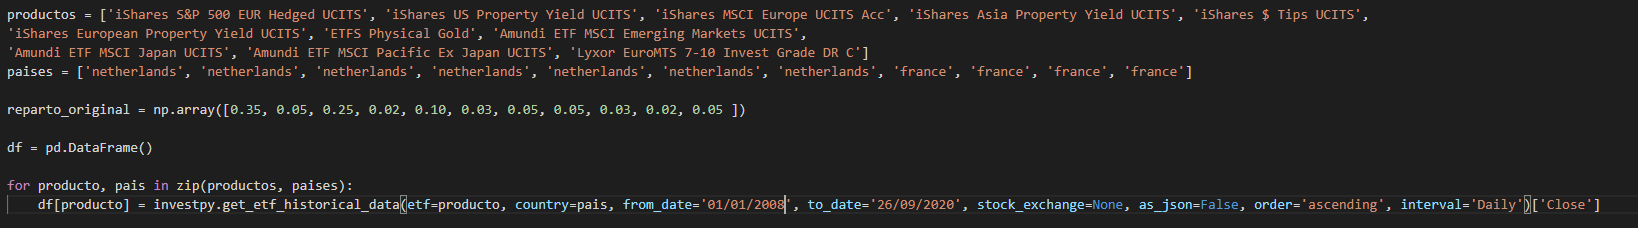

Podemos variar la fecha de inicio y fin a nuestro antojo (aconsejo irse a la fecha mas lejana en la que todos los productos o la mayoría de ellos tengan cotizaciones).

*En el enlace a Investpy hay varios .csv con todas los productos (acciones/fondos/ETF's... y cuales son sus nombres/tickers/mercados... abrirlos, buscar los vuestros y os dará la info que pasarle a la llamada de la API)

In [ ]:
import pandas as pd
import numpy as np
import investpy 

productos = ['iShares S&P 500 EUR Hedged UCITS', 'iShares US Property Vield UCITS']
paises = ['netherlands', 'netherlands']

reparto_original = np.array([0.5, 0,5])

df = pd.DataFrame()

for producto, pais in zip(productos, paises):
    print('Tratando producto, pais: ', producto, pais)
    df[producto] = investpy.get_etf_historical_data(etf=producto, country=pais, from_date='01/01/2008', to_date='26/09/2020', stock_exchange=None, as_json=None, order='ascending', interval='Daily')['Close']
    # df[producto] = investpy.get_etf_historical_data(etf=producto, country=pais, from_date='01/01/2008', to_date='26/09/2020')['Close']

In [10]:
import pandas as pd
import numpy as np
import yfinance as yf

productos = ['NVDA', 'AAPL']

reparto_original = np.array([0.5, 0.5])

df = pd.DataFrame()

for producto in productos:
    print('Tratando producto: ', producto)
    # df[producto] = yf.download(producto, start='2024-05-01', end='2024-06-29')['Close']
    df[producto] = yf.download(producto, end='2024-06-29')['Close']

df

Tratando producto:  NVDA
[*********************100%***********************]  1 of 1 completed
Tratando producto:  AAPL
[*********************100%***********************]  1 of 1 completed


,NVDA,AAPL
Date,,
1999-01-22,0.041019,0.345982
1999-01-25,0.045309,0.351563
1999-01-26,0.041799,0.361607
1999-01-27,0.041669,0.358259
1999-01-28,0.041539,0.364955
...,...,...
2024-06-04,116.436996,194.350006
2024-06-05,122.440002,195.869995
2024-06-06,120.998001,194.479996


### 3. Cálculos

A continuación calcularemos la rentabilidad y la volatilidad/riesgo, todo ello en términos anuales.

¿Cómo calculamos esto? 

In [11]:
diferencia_diaria = df.pct_change()
# print('Diferencia diaria: ', diferencia_diaria)
portAnualRetorno = np.sum(diferencia_diaria.mean()*reparto_original) * 252
print('Retorno anual: ', portAnualRetorno)

Retorno anual:  0.41405800479107613


Donde 252, son los días (mas o menos) hábiles de cotizaciones a lo largo del año, reparto_original son los pesos definidos anteriormente y 
diferencia_diaria es la rentabilidad diaria, es decir la variación de los precios cada día, que la podemos calcular con **df.pct_change()**

Para la volatilidad (desviación estándar) he usado la raíz cuadrada de la varianza, por lo que deberemos calcularla primero:

In [12]:
matriz_dif_anual = diferencia_diaria.cov() * 252

Calculamos un matriz de covarianza anualizada (matriz_dif_anual). Seguimos con la varianza de nuestro portfolio (port_dif) con la siguiente formula :

Expected portfolio variance = WT * (Covariance Matrix) * W

WT= reparto_original transpuesto, Covariance Matrix matriz_dif_anual y W reparto_original .

In [13]:
port_dif = np.dot(reparto_original.T, np.dot(matriz_dif_anual, reparto_original))
port_volatilidad = np.sqrt(port_dif)

### 4. Resultados

Obtenemos una rentabilidad anual esperada de un 7.62% para una volatilidad anual del 12.34%.

Aquí lo que nos tenemos que preguntar es lo siguiente, ¿puedo conseguir mayor rentabilidad con menor volatilidad? es decir, podría ganar mas sin estar tan expuesto a posibles perdidas?

In [15]:
print('Rentabilidad anual esperada: ', portAnualRetorno)
print('Volatilidad/Riesgo anual: ', port_volatilidad)

Rentabilidad anual esperada:  0.41405800479107613
Volatilidad/Riesgo anual:  0.4228903571056668


### 5. Optimización de la cartera

Esta parte la he sacado en su totalidad de la fantástica herramienta proporcionada por [Robert Andrew Martin](https://pyportfolioopt.readthedocs.io/en/latest/About.html) como es PyPortfolioOpt.

Dentro de su documentación podréis encontrar multitud de utilidades, nos centraremos en las que nos ayudan a optimizar nuestra cartera, si queréis profundizar más, pasaros por el repositorio de GitHub y darle una estrella :)

In [19]:
from pypfopt import expected_returns
from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt import risk_models

mu = expected_returns.mean_historical_return(df)
S = risk_models.sample_cov(df)
ef = EfficientFrontier(mu, S)
weights = ef.max_sharpe()
cleaned_weights = ef.clean_weights()
print(cleaned_weights)
ef.portfolio_performance(verbose=True)

OrderedDict([('NVDA', 0.33135), ('AAPL', 0.66865)])
Expected annual return: 31.3%
Annual volatility: 39.3%
Sharpe Ratio: 0.75


(0.31288981595690935, 0.39254833331528893, 0.7461242122295921)


mu será una serie de rendimientos esperados estimados para cada activo.

S será la matriz de covarianza estimada.

ef, Efficient Frontier, podemos muy muy muy resumirlo en que al combinar activos con diferentes volatilidades y rendimientos esperados, generamos una asignación matemáticamente óptima.

Luego usamos sharpe ratio, es el rendimiento de la cartera menos la tasa libre de riesgo, por unidad de riesgo (volatilidad)

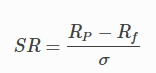

Mide los rendimientos de la cartera, ajustados por riesgo. Buscamos maximizar el sharpe ratio en lugar de reducir la volatilidad con ef.max_sharpe().

Pasamos el clean_weights, que nos deja los que activos que no sirven a 0 y nos da el reparto optimo para los restantes.

Y obtendríamos lo siguiente:

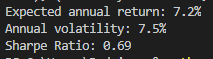

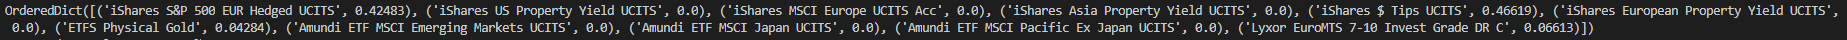

Al optimizar el portfolio, pasamos de una rentabilidad del 7.62% al 7.2% y de una volatilidad del 12.34% al 7.5%!!!

Ha disminuido la rentabilidad 0.42 puntos y la volatilidad 4.84 puntos.

Si nos fijamos en los repartos optimizados, ha optado por darle al SP500 un 42.483% a los bonos americanos 46.619%, al oro un 4.284% y a los bonos europeos un 6.613%. El modelo se suele quedar en 99.999% o 100.001% así que no preocuparse.

Interesante, como lo que hablábamos antes de "complicarse menos la vida" eligiendo activos, es finalmente lo que termina resultando como opción mas optima

Personalmente, aún viendo los resultados, seguiré con el plan del principio, pero esto me abre la mente a la creación de nuevas carteras, con distintos activos y distintas rentabilidades que puedo pasar por este código para ver que desempeño tendrán o como se podrían mejorar.

Espero que os haya servido y si hay algún error, comentármelo sin problema!!